<a href="https://colab.research.google.com/github/Bhaktaraj-Pooja/ML-Project/blob/main/Case4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing dataset into python**

In [28]:
## First Step - Import train.csv (Case 4 - Work life balance)

## inporting necessary libraries:

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
csvdata = pd.read_csv('/content/drive/MyDrive/train.csv')

In [31]:
csvdata.shape

(22750, 12)

In [32]:
csvdata.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Age', 'Tenure', 'Vacations taken',
       'Designation', 'Average Hours worked per day',
       'Employee satisfaction score', 'Mental Fatigue Score'],
      dtype='object')

In [33]:
csvdata.dtypes

Employee ID                      object
Date of Joining                  object
Gender                           object
Company Type                     object
WFH Setup Available              object
Age                               int64
Tenure                            int64
Vacations taken                   int64
Designation                       int64
Average Hours worked per day    float64
Employee satisfaction score     float64
Mental Fatigue Score            float64
dtype: object

# Displaying some rows from the begining of dataset

In [34]:
csvdata.head(25)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score
0,fffe32003000360033003200,2008-09-30,Female,Service,No,52,18,8,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,26,12,4,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,63,20,4,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,59,20,12,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,63,10,9,3,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,44,8,10,2,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,62,16,11,3,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,31,16,6,2,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,23,15,9,3,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,27,1,2,3,6.0,NaN,0.67


# **Data Preprocessing**

In [35]:
newframe = csvdata.rename(columns = {'Employee ID': 'Emp_ID',	'Date of Joining': 'Join_date',	'Company Type': 'Comp_type',	'WFH Setup Available': 'WFH',	'Vacations taken': 'Vacation',	'Designation': 'Desig',	'Average Hours worked per day': 'work_hours','Employee satisfaction score': 'Satisfaction', 'Mental Fatigue Score': 'Fatigue'}, inplace = False )
print(newframe)

                         Emp_ID   Join_date  ... Satisfaction Fatigue
0      fffe32003000360033003200  2008-09-30  ...          3.8    0.16
1          fffe3700360033003500  2008-11-30  ...          5.0    0.36
2      fffe31003300320037003900  2008-03-10  ...          5.8    0.49
3      fffe32003400380032003900  2008-11-03  ...          2.6    0.20
4      fffe31003900340031003600  2008-07-24  ...          6.9    0.52
...                         ...         ...  ...          ...     ...
22745  fffe31003500370039003100  2008-12-30  ...          NaN    0.41
22746  fffe33003000350031003800  2008-01-19  ...          6.7    0.59
22747          fffe390032003000  2008-11-05  ...          NaN    0.72
22748  fffe33003300320036003900  2008-01-10  ...          5.9    0.52
22749      fffe3400350031003800  2008-01-06  ...          7.8    0.61

[22750 rows x 12 columns]


In [36]:
from sklearn import preprocessing

In [37]:
newframe = newframe.drop(columns='Emp_ID', axis=1)

newframe.isna().sum()

Join_date          0
Gender             0
Comp_type          0
WFH                0
Age                0
Tenure             0
Vacation           0
Desig              0
work_hours      1381
Satisfaction    2117
Fatigue         1011
dtype: int64

In [38]:
#missing values treatment

miss_index = newframe.loc[newframe['Fatigue'].isna(), :].index
newframe = newframe.drop(miss_index, axis=0).reset_index(drop = True)
for column in ['work_hours', 'Satisfaction']:
  newframe[column] = newframe[column].fillna(newframe[column].mean())

newframe.isna().sum()


Join_date       0
Gender          0
Comp_type       0
WFH             0
Age             0
Tenure          0
Vacation        0
Desig           0
work_hours      0
Satisfaction    0
Fatigue         0
dtype: int64

In [39]:
newframe1 = newframe.drop_duplicates(keep= 'first', inplace= False)

newframe['Join_date'] = pd.to_datetime(newframe['Join_date'])
newframe['Join_year'] = newframe['Join_date'].apply(lambda x: x.year)
newframe['Join_month'] = newframe['Join_date'].apply(lambda x: x.month)
newframe['Join_day'] = newframe['Join_date'].apply(lambda x: x.day)
newframe = newframe.drop('Join_date', axis=1)

In [40]:
newframe.describe(include= 'all')

,Gender,Comp_type,WFH,Age,Tenure,Vacation,Desig,work_hours,Satisfaction,Fatigue,Join_year,Join_month,Join_day
count,21739,21739,21739,21739.000000,21739.000000,21739.000000,21739.000000,21739.000000,21739.000000,21739.000000,21739.0,21739.000000,21739.000000
unique,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,Service,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11407,14191,11740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,43.027324,10.494411,5.954828,2.178849,4.483249,5.730314,0.449656,2008.0,6.513041,15.756797
std,NaN,NaN,NaN,12.940723,5.776665,3.739035,1.135227,1.986082,1.831488,0.200365,0.0,3.441285,8.779454
min,NaN,NaN,NaN,21.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2008.0,1.000000,1.000000
25%,NaN,NaN,NaN,32.000000,5.000000,3.000000,1.000000,3.000000,4.700000,0.310000,2008.0,4.000000,8.000000
50%,NaN,NaN,NaN,43.000000,10.000000,6.000000,2.000000,4.483249,5.730314,0.450000,2008.0,7.000000,16.000000
75%,NaN,NaN,NaN,54.000000,16.000000,9.000000,3.000000,6.000000,6.900000,0.590000,2008.0,9.000000,23.000000


##Data Visualization

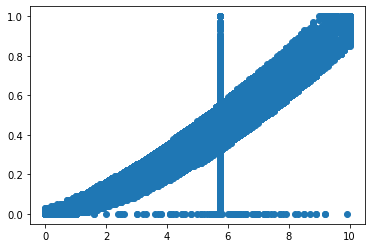

In [41]:
plt.scatter(newframe1.Satisfaction, newframe1.Fatigue)

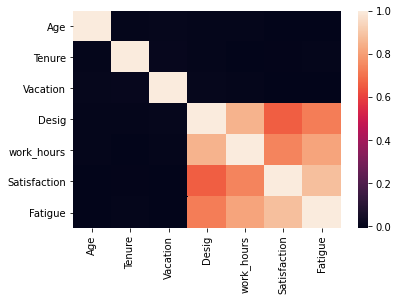

In [42]:
import seaborn as sns

newframe_numeric = newframe1[['Age', 'Tenure', 'Vacation', 'Desig', 'work_hours', 'Satisfaction', 'Fatigue']]
data_corr = newframe_numeric.corr()
sns.heatmap(data_corr, xticklabels= data_corr.columns, yticklabels= data_corr.columns)

**Using Pandas Profiling for checking nature of dataset**

In [54]:
from pandas_profiling import ProfileReport

profile = ProfileReport(newframe, )

TypeError: ignored